# Support Vector Machine (SVM) Classification

In [1]:
import init
from common import constants as cn
from common.trinary_data import TrinaryData
from common.data_provider import DataProvider
from common_python.plots import util_plots
from plots import util_plots as xutil_plots
from common_python.classifier import classifier_ensemble

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
data = TrinaryData()
data.df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
T1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


## SVM Analysis

In [3]:
lin_clf = svm.LinearSVC()
lin_clf.fit(data.df_X, data.ser_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [4]:
alist = ['b', 'a', 'c']
order = [2, 3, 1]
sorted(zip(alist, order), key=lambda v: v[1])

[('c', 1), ('b', 2), ('a', 3)]

In [5]:
lin_clf.score(data.df_X, data.ser_y)

1.0

In [6]:
dir(lin_clf)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_predict_proba_lr',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'loss',
 'max_iter',
 'multi_class',
 'n_iter_',
 'penalty',
 'predict',
 'random_state',
 'score',
 'set_params',
 'sparsify',
 'tol',
 'verbose']

In [7]:
[max([np.abs(x) for x in xv]) for xv in zip(*lin_clf.coef_)]

[0.014515358315428085,
 0.01344355566592684,
 0.014468027566764737,
 0.023665993094791945,
 0.015592875722788252,
 0.013105139369762337,
 0.017097489521899573,
 0.01608061843317331,
 0.017053868229358567,
 0.013984158670555713,
 0.013619621258297219,
 0.011152011207210287,
 0.012741603133565782,
 0.013558475687331132,
 0.01967603992437637,
 0.01231538264973975,
 0.016019191588115017,
 0.01743808699044278,
 0.009621745038597942,
 0.015771721500633426,
 0.013771018111156122,
 0.013179963335239783,
 0.013179963335239783,
 0.015597097382934867,
 0.013138643431970324,
 0.01157911144769495,
 0.010272857384400995,
 0.013771018111156125,
 0.01942245809291371,
 0.012980965911349548,
 0.020463282452861345,
 0.013450737509828241,
 0.013456611402047462,
 0.013892757594343458,
 0.010272857384400995,
 0.009773289469483748,
 0.012070602283837032,
 0.01096331197624786,
 0.01357748612130466,
 0.014454661274109736,
 0.012953596325032816,
 0.014457679033810495,
 0.012908077448958662,
 0.01382827411521415

In [8]:
predicted_class = []
for index in data.df_X.index:
     predicted = lin_clf.predict(data.df_X.loc[[index],:])[0]
     predicted_class.append(predicted)

In [9]:
predicted_class

[0, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 3, 3, 3, 3, 4, 4, 4, 2, 2, 2, 0, 0, 0, 0]

In [10]:
# Predicting a class
lin_clf.predict(data.df_X.loc[["T18"],:])

array([4])

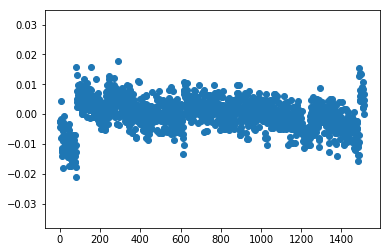

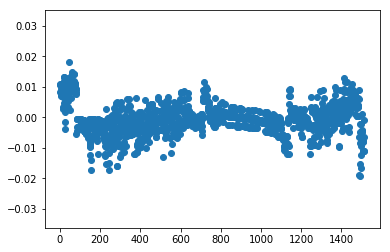

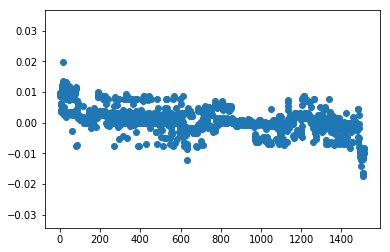

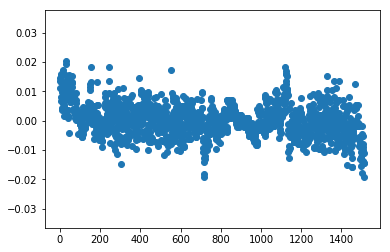

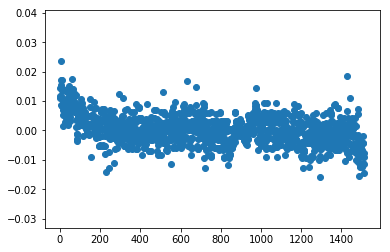

In [11]:
for n in range(5):
    plt.figure()
    plt.scatter(range(1515), lin_clf.coef_[n])

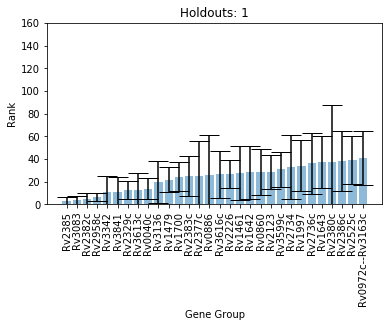

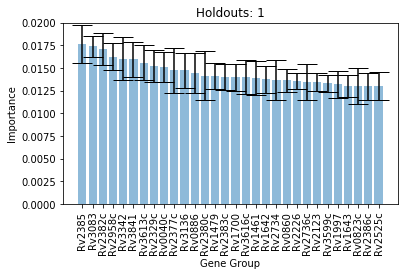

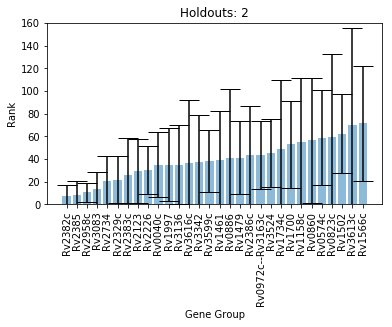

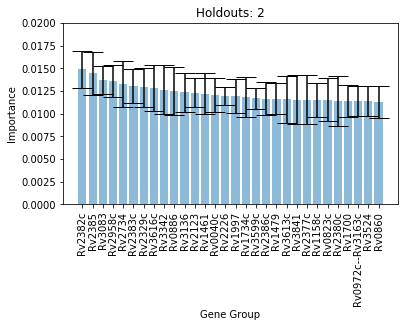

In [19]:
# Analysis of rank of gene for multiple iterations of cross validations
def pruneNormoxia(container):
    new_container = container.copy()
    new_container = new_container.drop(index=["T1"])
    return new_container
for holdouts in [1, 2]:
    df_X = pruneNormoxia(data.df_X)
    ser_y = pruneNormoxia(data.ser_y)
    df_X.columns = data.features
    result = classifier_ensemble.LinearSVMEnsemble.crossValidate(df_X, ser_y,
                                                                 iterations=500, holdouts=holdouts)
    result.ensemble.plotRank(top=30, title="Holdouts: %d" % holdouts, ylim=(0,160))
    result.ensemble.plotImportance(top=30, title="Holdouts: %d" % holdouts, ylim=(0, 0.02))

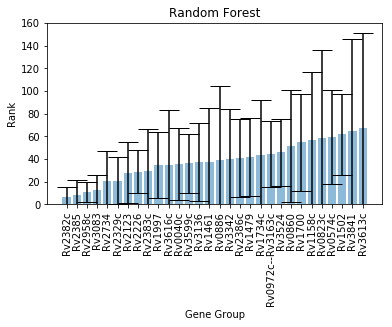

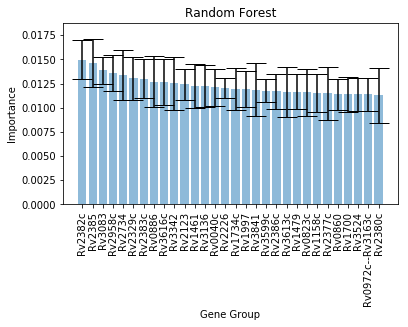

In [17]:
# Random forest
df_X = pruneNormoxia(data.df_X)
ser_y = pruneNormoxia(data.ser_y)
df_X.columns = data.features
ensemble = classifier_ensemble.RandomForestEnsemble(df_X, ser_y, num_iterations=20,
                        n_estimators=5000, max_features=1500, random_state=0,
                        min_samples_split=2, bootstrap=True)
result.ensemble.plotRank(top=30, title="Random Forest", ylim=(0,160))
result.ensemble.plotImportance(top=30, title="Random Forest")